<a href="https://colab.research.google.com/github/AishlyManglani/Deep-Learning_-CMPE258/blob/main/neural%20networks/pytorch_3layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Import necessary libraries
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [9]:
# Generate synthetic data
torch.manual_seed(0)
X = torch.rand(100, 3)  # 3 input features
y = torch.sin(X[:, 0]) + torch.cos(X[:, 1]) + torch.tanh(X[:, 2]) + torch.normal(0, 0.1, (100,))

# Initialize weights
input_size = 3
hidden_size1 = 5
hidden_size2 = 5
output_size = 1

weights_input_hidden1 = torch.randn(input_size, hidden_size1, requires_grad=True)
weights_hidden1_hidden2 = torch.randn(hidden_size1, hidden_size2, requires_grad=True)
weights_hidden2_output = torch.randn(hidden_size2, output_size, requires_grad=True)

# Training parameters
learning_rate = 0.01
epochs = 1000
losses = []

In [10]:
# Training loop
for epoch in range(epochs):
    # Forward pass
    hidden1 = torch.sigmoid(X @ weights_input_hidden1)
    hidden2 = torch.sigmoid(hidden1 @ weights_hidden1_hidden2)
    output = torch.sigmoid(hidden2 @ weights_hidden2_output)

    # Calculate loss (Mean Squared Error)
    loss = F.mse_loss(output.squeeze(), y)
    losses.append(loss.item())

    # Backward pass
    loss.backward()

    # Update weights
    with torch.no_grad():
        weights_input_hidden1 -= learning_rate * weights_input_hidden1.grad
        weights_hidden1_hidden2 -= learning_rate * weights_hidden1_hidden2.grad
        weights_hidden2_output -= learning_rate * weights_hidden2_output.grad

        # Zero gradients
        weights_input_hidden1.grad.zero_()
        weights_hidden1_hidden2.grad.zero_()
        weights_hidden2_output.grad.zero_()

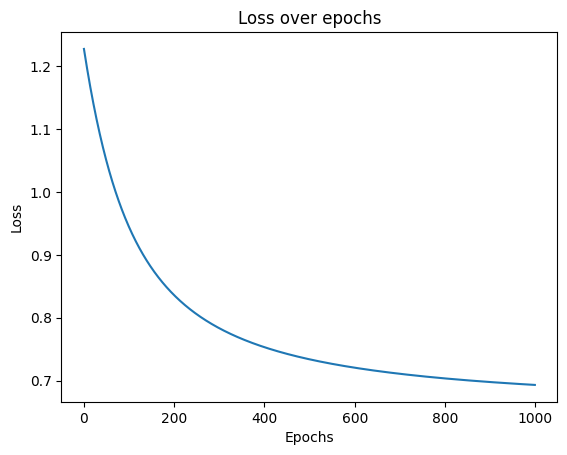

Final output: tensor([[0.9712],
        [0.9728],
        [0.9736],
        [0.9726],
        [0.9702],
        [0.9744],
        [0.9729],
        [0.9747],
        [0.9745],
        [0.9709],
        [0.9717],
        [0.9684],
        [0.9741],
        [0.9724],
        [0.9702],
        [0.9742],
        [0.9739],
        [0.9743],
        [0.9734],
        [0.9700],
        [0.9725],
        [0.9735],
        [0.9743],
        [0.9724],
        [0.9752],
        [0.9719],
        [0.9696],
        [0.9720],
        [0.9728],
        [0.9713],
        [0.9748],
        [0.9707],
        [0.9718],
        [0.9745],
        [0.9689],
        [0.9700],
        [0.9722],
        [0.9744],
        [0.9723],
        [0.9737],
        [0.9724],
        [0.9711],
        [0.9715],
        [0.9727],
        [0.9739],
        [0.9729],
        [0.9751],
        [0.9742],
        [0.9733],
        [0.9703],
        [0.9708],
        [0.9715],
        [0.9724],
        [0.9721],
        [0.971

In [11]:
# Plotting the loss
plt.plot(losses)
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Final output
print("Final output:", output)